## 0_Importações_Drebin215 (2012)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Tirando limites de exibição de linhas e colunas
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [41]:
drebin = pd.read_csv('../2_Permissions_Only_Subsets/Permission_Drebin215.csv')

## 1_Exploração_de_Dados

In [4]:
drebin.drop(columns=['Unnamed: 0'], inplace=True)
drebin.head()

,SEND_SMS,READ_PHONE_STATE,GET_ACCOUNTS,RECEIVE_SMS,READ_SMS,USE_CREDENTIALS,MANAGE_ACCOUNTS,WRITE_SMS,READ_SYNC_SETTINGS,AUTHENTICATE_ACCOUNTS,WRITE_HISTORY_BOOKMARKS,INSTALL_PACKAGES,CAMERA,WRITE_SYNC_SETTINGS,READ_HISTORY_BOOKMARKS,INTERNET,RECORD_AUDIO,NFC,ACCESS_LOCATION_EXTRA_COMMANDS,WRITE_APN_SETTINGS,BIND_REMOTEVIEWS,READ_PROFILE,MODIFY_AUDIO_SETTINGS,READ_SYNC_STATS,BROADCAST_STICKY,WAKE_LOCK,RECEIVE_BOOT_COMPLETED,RESTART_PACKAGES,BLUETOOTH,READ_CALENDAR,READ_CALL_LOG,SUBSCRIBED_FEEDS_WRITE,READ_EXTERNAL_STORAGE,VIBRATE,ACCESS_NETWORK_STATE,SUBSCRIBED_FEEDS_READ,CHANGE_WIFI_MULTICAST_STATE,WRITE_CALENDAR,MASTER_CLEAR,UPDATE_DEVICE_STATS,WRITE_CALL_LOG,DELETE_PACKAGES,GET_TASKS,GLOBAL_SEARCH,DELETE_CACHE_FILES,WRITE_USER_DICTIONARY,REORDER_TASKS,WRITE_PROFILE,SET_WALLPAPER,BIND_INPUT_METHOD,READ_SOCIAL_STREAM,READ_USER_DICTIONARY,PROCESS_OUTGOING_CALLS,CALL_PRIVILEGED,BIND_WALLPAPER,RECEIVE_WAP_PUSH,DUMP,BATTERY_STATS,ACCESS_COARSE_LOCATION,SET_TIME,WRITE_SOCIAL_STREAM,WRITE_SETTINGS,REBOOT,BLUETOOTH_ADMIN,BIND_DEVICE_ADMIN,WRITE_GSERVICES,KILL_BACKGROUND_PROCESSES,CLEAR_APP_USER_DATA,STATUS_BAR,PERSISTENT_ACTIVITY,CHANGE_NETWORK_STATE,RECEIVE_MMS,SET_TIME_ZONE,CONTROL_LOCATION_UPDATES,BROADCAST_WAP_PUSH,BIND_ACCESSIBILITY_SERVICE,ADD_VOICEMAIL,CALL_PHONE,BIND_APPWIDGET,FLASHLIGHT,READ_LOGS,SET_PROCESS_LIMIT,MOUNT_UNMOUNT_FILESYSTEMS,BIND_TEXT_SERVICE,INSTALL_LOCATION_PROVIDER,SYSTEM_ALERT_WINDOW,MOUNT_FORMAT_FILESYSTEMS,CHANGE_CONFIGURATION,CHANGE_WIFI_STATE,READ_FRAME_BUFFER,ACCESS_SURFACE_FLINGER,BROADCAST_SMS,EXPAND_STATUS_BAR,INTERNAL_SYSTEM_WINDOW,SET_ACTIVITY_WATCHER,WRITE_CONTACTS,BIND_VPN_SERVICE,DISABLE_KEYGUARD,ACCESS_MOCK_LOCATION,GET_PACKAGE_SIZE,MODIFY_PHONE_STATE,CHANGE_COMPONENT_ENABLED_STATE,CLEAR_APP_CACHE,SET_ORIENTATION,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


**Quantidade de aplicativos benignos e malignos**

[Text(0.5, 0, ''), Text(0, 0.5, '')]

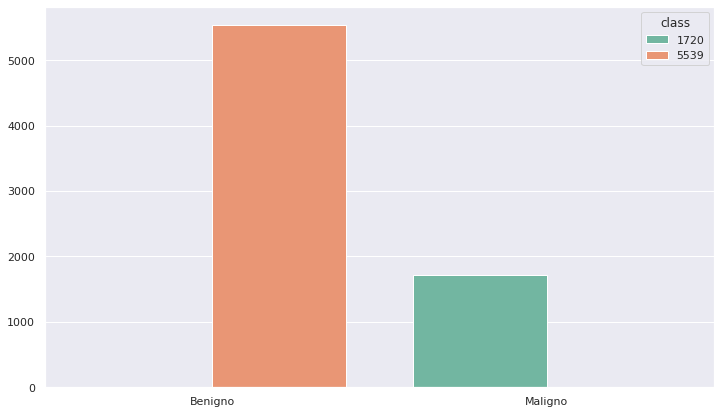

In [5]:
number = drebin['class'].value_counts()
sns.set(rc={"figure.figsize":(12, 7)})
sns.barplot(x = ["Benigno","Maligno"], y = number, hue = number, palette = "Set2").set(xlabel='', ylabel='')

**Proporção de benignos e maligos**

In [40]:
proportion = number[0] / number[1]
print('Maligno 1 : %.2f Benignos'%proportion)

Maligno 1 : 3.22 Benignos


**Top 5 permissões mais utilizadas por benignos e malignos**

In [11]:
permissions_class_sum = drebin.groupby('class').sum().loc[:,]
permissions_ben = permissions_class_sum.loc[0].sort_values(ascending=False)[:5]
permissions_mal = permissions_class_sum.loc[1].sort_values(ascending=False)[:5]

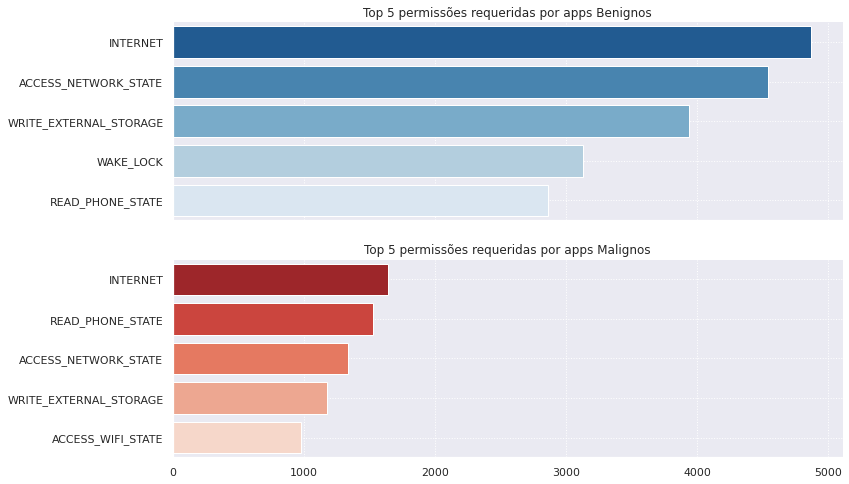

In [15]:
fig, axs = plt.subplots(figsize=(12, 8), ncols=1, nrows=2, sharex=True)

sns.barplot(y=permissions_ben.index, x=permissions_ben.values, palette="Blues_r", ax=axs[0])
axs[0].set_title('Top 5 permissões requeridas por apps Benignos')
axs[0].grid(linestyle='dotted')
axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)

sns.barplot(y=permissions_mal.index, x=permissions_mal.values, palette='Reds_r', ax=axs[1])
axs[1].set_title('Top 5 permissões requeridas por apps Malignos')
axs[1].grid(linestyle='dotted')
axs[1].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)

**Top 10 permissões mais requeridas**

In [19]:
permissions_sum = drebin.sum().loc[:,]
permissions_sum.sort_values(ascending=False)

INTERNET                          6511
ACCESS_NETWORK_STATE              5879
WRITE_EXTERNAL_STORAGE            5118
READ_PHONE_STATE                  4394
WAKE_LOCK                         3792
ACCESS_WIFI_STATE                 3470
VIBRATE                           2891
RECEIVE_BOOT_COMPLETED            2644
GET_ACCOUNTS                      2530
ACCESS_FINE_LOCATION              2313
ACCESS_COARSE_LOCATION            2266
class                             1720
READ_CONTACTS                     1648
GET_TASKS                         1514
WRITE_SETTINGS                    1178
CHANGE_WIFI_STATE                 1148
CAMERA                            1143
READ_SMS                           889
READ_EXTERNAL_STORAGE              859
SEND_SMS                           844
CALL_PHONE                         807
MANAGE_ACCOUNTS                    793
USE_CREDENTIALS                    793
RECEIVE_SMS                        773
WRITE_CONTACTS                     755
RECORD_AUDIO             

In [23]:
top_permissions_sum = permissions_sum.loc[:].sort_values(ascending=False)[:10]

<AxesSubplot:>

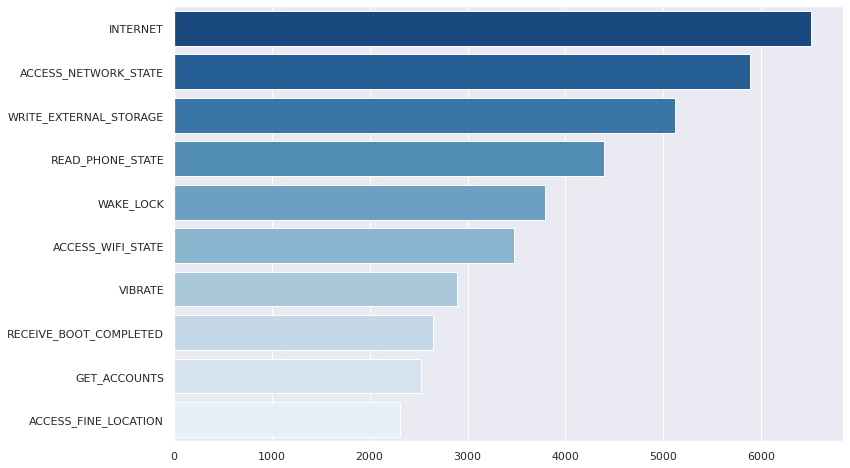

In [26]:
fig, axs = plt.subplots(figsize=(12, 8), ncols=1, nrows=1, sharex=True)

sns.barplot(y=top_permissions_sum.index, x=top_permissions_sum.values, palette="Blues_r")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3230624e-876d-4f9f-a1ca-0058a560220a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>